<a href="https://colab.research.google.com/github/valenderval/MLA_JFV/blob/main/FinalProject_Regression_JFV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Final Project - Regression
Jacob Vallery <br>CS430-ON <br>Machine Learning in the Cloud

#Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Imports for specific models

In [5]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

#Imports for Splitting Data and Building Pipeline

In [6]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#Imports for Performance Measures

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#Confusion Matrix Function

In [8]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

#ROC_Curve Function

In [9]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

#Regression

#Aquire Data -

Weather history for Szeged, Hungary area, between 2006 and 2016.

In [10]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/weatherHistory.csv')

In [11]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
# @title humidity

from matplotlib import pyplot as plt
df['humidity'].plot(kind='hist', bins=20, title='humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
df.head(2)

,Formatted Date,Summary,Precip Type,temp_c,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [14]:
df.rename(columns={'Precip Type': 'precip_type'}, inplace=True)
df.rename(columns={'Temperature (C)': 'temp_c'}, inplace=True)
df.rename(columns={'Apparent Temperature (C)': 'apparent_temp_c'}, inplace=True)
df.rename(columns={'Humidity': 'humidity'}, inplace=True)
df.rename(columns={'Wind Speed (km/h)': 'wind_speed'}, inplace=True)
df.rename(columns={'Wind Bearing (degrees)': 'wind_bearing'}, inplace=True)
df.rename(columns={'Visibility (km)': 'visibility'}, inplace=True)
df.rename(columns={'Loud Cover': 'loud_cover'}, inplace=True)
df.rename(columns={'Pressure (millibars)': 'pressure_millibars'}, inplace=True)

In [15]:
df.head(2)

,Formatted Date,Summary,precip_type,temp_c,apparent_temp_c,humidity,wind_speed,wind_bearing,visibility,loud_cover,pressure_millibars,Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [23]:
df['Summary'].value_counts()

,count
Summary,
Partly Cloudy,31733
Mostly Cloudy,28094
Overcast,16597
Clear,10890
Foggy,7148
Breezy and Overcast,528
Breezy and Mostly Cloudy,516
Breezy and Partly Cloudy,386
Dry and Partly Cloudy,86


#Statistical and Visual Exploration

In [16]:
df.describe()

,temp_c,apparent_temp_c,humidity,wind_speed,wind_bearing,visibility,loud_cover,pressure_millibars
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [22]:
df['humidity'].value_counts()

,count
humidity,
0.93,5708
0.92,3888
0.96,3843
1.00,2890
0.89,2837
...,...
0.15,10
0.16,8
0.14,4


In [26]:
humidity_count = df['humidity'].value_counts()

<Figure size 1000x500 with 0 Axes>

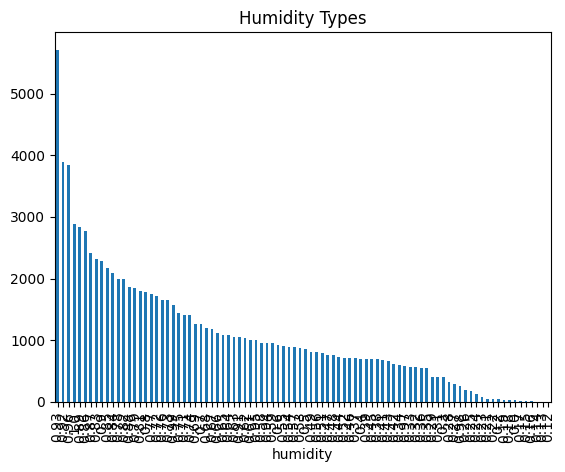

<Figure size 1000x500 with 0 Axes>

In [27]:

humidity_count.plot(kind='bar')
plt.title('Humidity Types')
plt.figure(figsize=(10, 5))

In [24]:
summary_count = df['Summary'].value_counts()

<Figure size 1000x500 with 0 Axes>

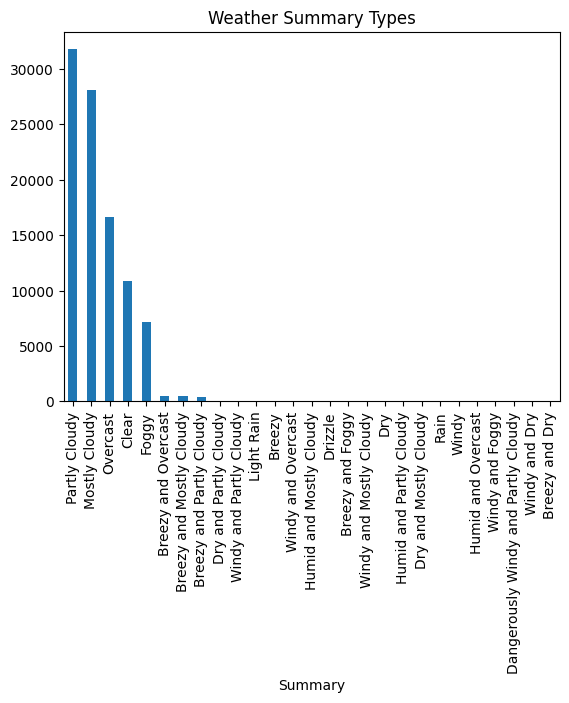

<Figure size 1000x500 with 0 Axes>

In [25]:

summary_count.plot(kind='bar')
plt.title('Weather Summary Types')
plt.figure(figsize=(10, 5))

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=temp_c.value_counts , y=humidity.values_counts)
plt.title('Humidity vs temperature', fontsize=16)
plt.xlabel('Temperature (C)', fontsize=14)
plt.ylabel('Humidity', fontsize=14)

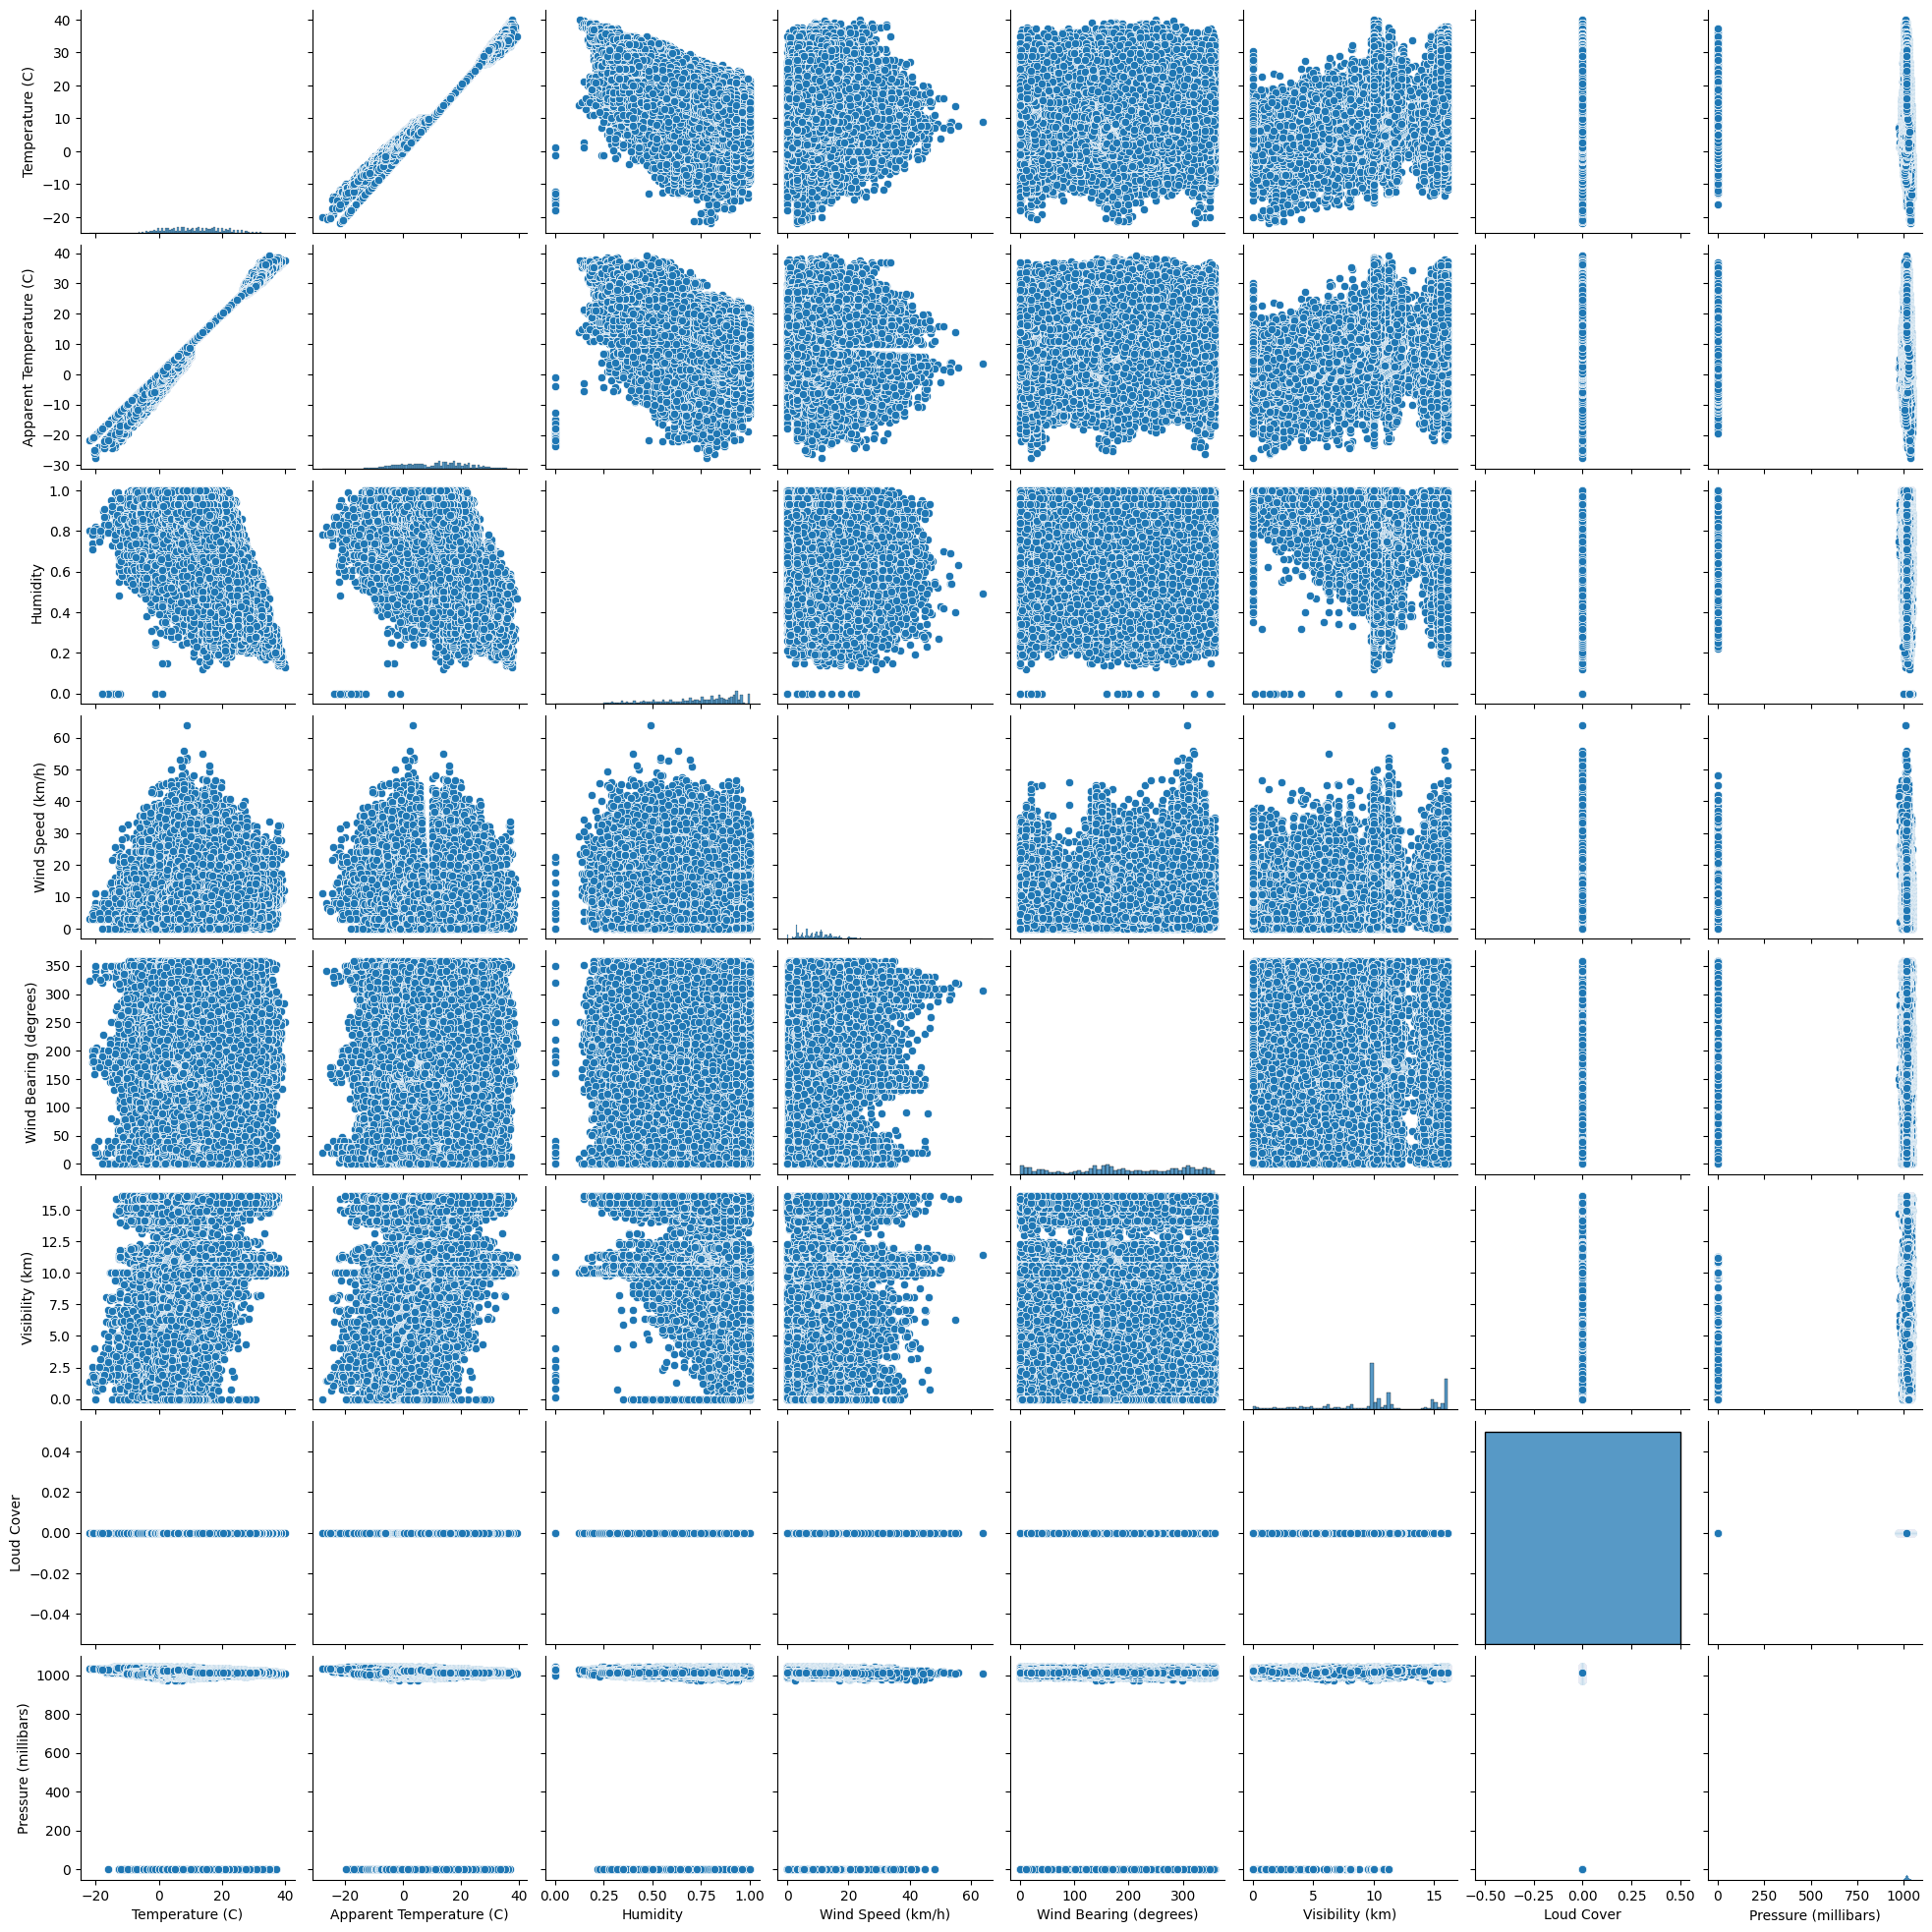

In [ ]:
sns.pairplot(df)
plt.show()

#Splitting Data into Train/Test

In [17]:
X = df.drop(columns=['humidity','Formatted Date','Summary','precip_type','Daily Summary'])
y = df['humidity']

In [18]:
X.head()

,temp_c,apparent_temp_c,wind_speed,wind_bearing,visibility,loud_cover,pressure_millibars
0,9.472222,7.388889,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,11.0446,259.0,15.8263,0.0,1016.51


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=32)

#Building the Pipeline

In [20]:
num_attribs = ['temp_c','apparent_temp_c','Wind_speed','wind_bearing','visibility','loud_cover','pressure_millibars']

In [21]:
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(), num_attribs)],
                               remainder='passthrough')

In [ ]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('mlr_model', LinearRegression()),
])

In [ ]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('SVCLinear', SVC(kernel="linear", C=1, max_iter=10000)),
                     ])

#Executing the Model

#Evaluating Model

#Conclusion

Write a general conclusion about the results of your model.

If theres a Problem 2 :Problem 2
Reading the Data
Splitting Data into Train/Test
Building the Pipeline
Executing the Model
Evaluating Model
Conclusion
Write a general conclusion about the results of your model.
